In [123]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [124]:
data = pd.read_excel('C:/Personal/09142640/Downloads/Crimes_new_york_by_city_2014.xls', sheet_name=0, header=4)
data.columns.values[8]='Property_Crime'
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000


In [125]:
data = data.drop(data[data.Population > 15000].index)

In [126]:
data['Sq_population']=data['Population']**2
data['Burglary_Flag']=np.where((data['Burglary']>0),1,0)
data['Robbery_Flag']=np.where((data['Robbery']>0),1,0)

In [127]:
regr = linear_model.LinearRegression()
Y = data[['Property_Crime']]
X = data[['Burglary','Population','Robbery','Sq_population','Burglary_Flag','Robbery_Flag']]
X=X.fillna(0)
Y=Y.fillna(0)
regr.fit(X, Y)
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 4.97371873e+00 -2.47077325e-03 -4.08907146e-01  4.86597634e-07
  -3.52958329e-01  2.00670218e+01]]

Intercept: 
 [5.05865105]

R-squared:
0.7975651978046295


In [128]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Burglary,Population,Robbery,Sq_population,Burglary_Flag,Robbery_Flag
Burglary,1.000,0.592,0.698,0.592,0.305,0.518
Population,0.592,1.000,0.492,0.961,0.328,0.523
Robbery,0.698,0.492,1.000,0.501,0.178,0.569
Sq_population,0.592,0.961,0.501,1.000,0.236,0.472
Burglary_Flag,0.305,0.328,0.178,0.236,1.000,0.285
Robbery_Flag,0.518,0.523,0.569,0.472,0.285,1.000


In [129]:
data = data[['Property_Crime', 'Burglary','Population','Robbery','Sq_population','Burglary_Flag','Robbery_Flag']]
linear_formula = 'Property_Crime~Burglary+Population+Robbery+Sq_population+Burglary_Flag+Robbery_Flag'

In [130]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
from scipy import stats
lm = smf.ols(formula=linear_formula,data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Property_Crime   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     172.0
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           3.41e-88
Time:                        19:38:44   Log-Likelihood:                -1460.4
No. Observations:                 271   AIC:                             2935.
Df Residuals:                     264   BIC:                             2960.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2345     10.855      0.574

The model shows that outcome Property crime is predicted by the features Burglary,Population,Robbery,Sq_population,Burglary_Flag,Robbery_Flag explains 79.7% of the variance in Property crime

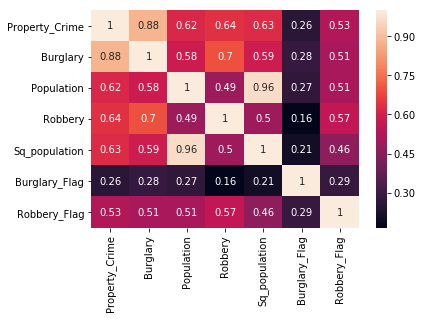

In [109]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [110]:
data = data.loc[:, [ 'Property_Crime','Burglary','Population','Robbery','Sq_population','Burglary_Flag','Robbery_Flag']]

# Trimmed correlation matrix
corr_matrix_data = data.corr()
print(corr_matrix_data)

                Property_Crime  Burglary  Population  Robbery  Sq_population  \
Property_Crime           1.000     0.880       0.618    0.638          0.626   
Burglary                 0.880     1.000       0.585    0.696          0.586   
Population               0.618     0.585       1.000    0.489          0.964   
Robbery                  0.638     0.696       0.489    1.000          0.497   
Sq_population            0.626     0.586       0.964    0.497          1.000   
Burglary_Flag            0.258     0.284       0.272    0.165          0.207   
Robbery_Flag             0.532     0.511       0.512    0.566          0.463   

                Burglary_Flag  Robbery_Flag  
Property_Crime          0.258         0.532  
Burglary                0.284         0.511  
Population              0.272         0.512  
Robbery                 0.165         0.566  
Sq_population           0.207         0.463  
Burglary_Flag           1.000         0.285  
Robbery_Flag            0.285        

The above model shows that output variable Property_Crime is closely correlated to Burglary  and Robbery,so we will ignore rest of the features

Revised Model

In [111]:
data = data[['Property_Crime','Burglary','Robbery']]
linear_formula = 'Property_Crime~Burglary+Robbery'

In [88]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
from scipy import stats
lm = smf.ols(formula=linear_formula,data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Property_Crime   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     463.8
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           9.32e-88
Time:                        19:14:00   Log-Likelihood:                -1473.4
No. Observations:                 271   AIC:                             2953.
Df Residuals:                     268   BIC:                             2964.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5985      4.212      2.279      0.0

The revised  model shows that output variable  Property crime is predicted by the features Burglary,Robbery and it  explains 77.6% of the variance in Property crime which is relatively better than the original model.Also, the features doesnt seem to be correlated with each other

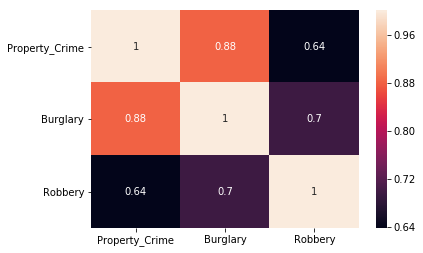

In [112]:
sns.heatmap(data.corr(),annot=True)
plt.show()

The above heatmap shows Output variable Property_Crime is highly correlated to the feature Burglary

In [113]:
sk_ftse_model = linear_model.LinearRegression()
score = cross_val_score(sk_ftse_model, X, Y, cv=5)
print(" Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

 Accuracy: 0.77 (+/- 0.14)


In [117]:
data1=data.fillna(0)

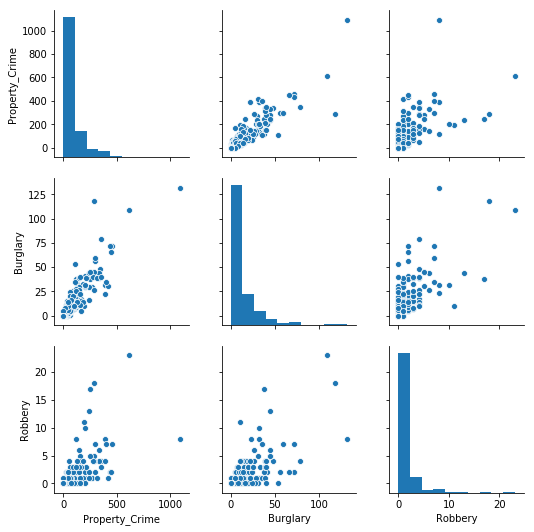

In [118]:
sns.pairplot(data1)

K- Nearest Neighbor Regression

In [135]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
Y =  data[['Property_Crime']]
X = data[['Burglary','Population','Robbery','Sq_population','Burglary_Flag','Robbery_Flag']]
Y=Y.fillna(0)
X=X.fillna(0)
# Build our model.

knn.fit(X, Y)

#y_pred = knn.predict(X)

print('\nR-squared:')
print('%.3f' % (knn.score(X, Y)) )
#cv=5 holdouts
knn_score = cross_val_score(knn, X, Y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (knn_score.mean(), knn_score.std() * 2))


R-squared:
0.463

Accuracy: 0.12 (+/- 0.27)


Let's now weight the KNN scores

In [136]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
Y =  data[['Property_Crime']]
X = data[['Burglary','Population','Robbery','Sq_population','Burglary_Flag','Robbery_Flag']]
Y=Y.fillna(0)
X=X.fillna(0)

# Build our model.

knn_w.fit(X, Y)

#y_pred = knn_w.predict(X)

print('\nR-squared:')
print('%.3f' % (knn_w.score(X, Y)) )

knnw_score = cross_val_score(knn_w, X, Y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (knnw_score.mean(), knnw_score.std() * 2))


R-squared:
1.000

Accuracy: 0.02 (+/- 0.67)


In KNN ,it shows that unweighted is more accrurate than weighted one.The variance seems to be increasing from unweighted to weighted ones.

# Conclusion:

At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. 

KNN Regression Model is more accurate than OLS Regression model as per the analysis above with values of unweighted KNN having variance of 27% and OLS having variance of 79.6% when compared both.I will chose KNN because of its accuracy.

I will chose OLS over KNN if both are similary accurate since OLS provides more details about the analysis than KNN.  